<a href="https://colab.research.google.com/github/Kira1108/play-image-gen/blob/main/StableDiffusionGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title StableDiffusion
from IPython.display import clear_output
!pip install diffusers transformers datasets accelerate pillow

from diffusers import StableDiffusionPipeline  
from diffusers import (
    DDPMScheduler,
    DDIMScheduler,
    PNDMScheduler,
    LMSDiscreteScheduler,
    EulerDiscreteScheduler,
    EulerAncestralDiscreteScheduler,
    DPMSolverMultistepScheduler
)                                                                                                                                                                                         
                                                                                                                                                                                                                                                 
import torch
from PIL import Image  
    

clear_output()

In [ ]:
#@title Model Selection
model_id:str="runwayml/stable-diffusion-v1-5" #@param 
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype = torch.float16)
pipe.to("cuda")
clear_output()

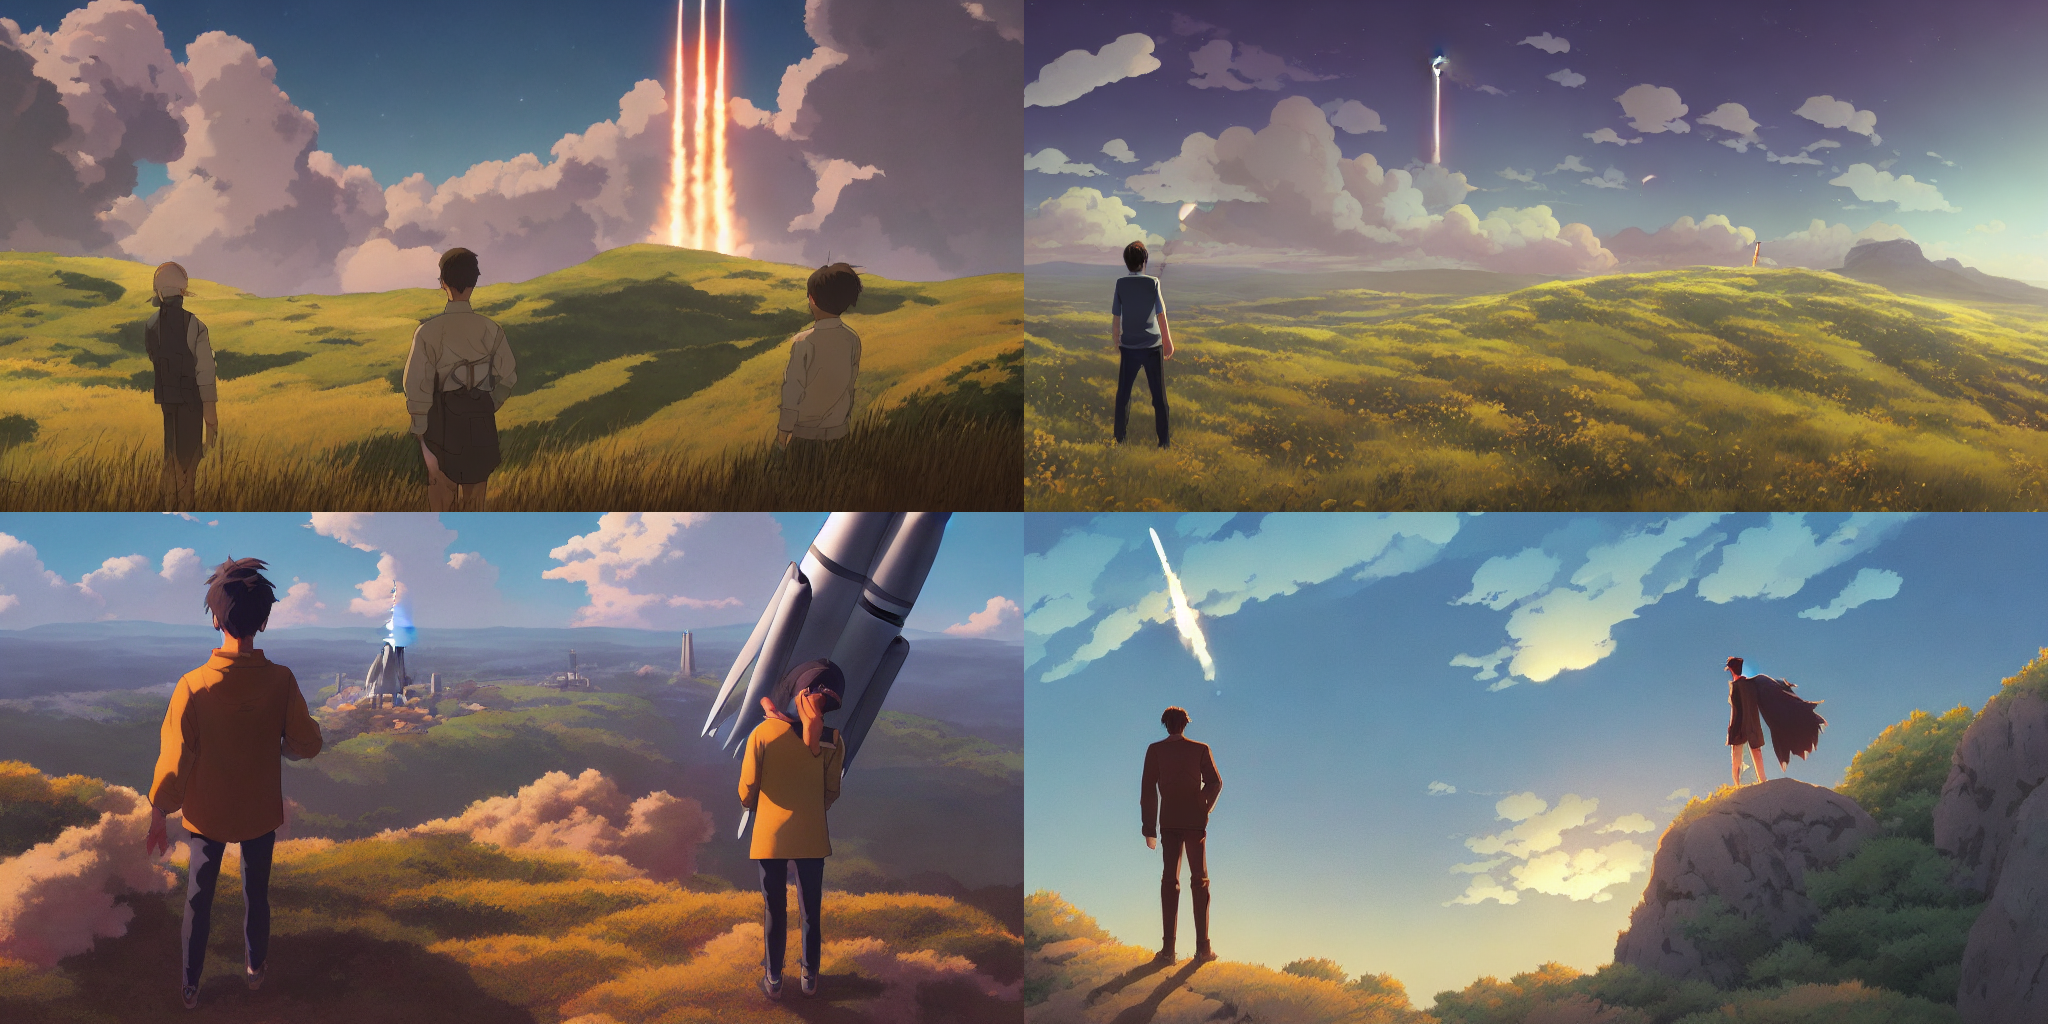

In [ ]:
#@title Generate Images

# config sequential
sequential = True #@param {type:"boolean"}
if sequential:
    pipe.enable_attention_slicing()

# config scheduler
schedulers = {
    'ddms':DDPMScheduler,
    'ddim':DDIMScheduler,
    'pndm':PNDMScheduler,
    'lms':LMSDiscreteScheduler,
    'euler_dis':EulerDiscreteScheduler,
    'euler_an':EulerAncestralDiscreteScheduler,
    'dpmsolv':DPMSolverMultistepScheduler
}

scheduler = 'default' #@param ['default','ddms', 'ddim', 'pndm', 'lms', 'euler_dis', 'euler_an', 'dpmsolv'] {"type":"raw"}

if scheduler != "default":
    pipe.scheduler = scheduler


seed = 4 #@param {"type":"integer"}
if seed >= 0:
    generator = torch.Generator("cuda").manual_seed(0) 
else:
    generator = None

num_inference_steps = 20 #@param {type:"slider", min:1, max:100, step:1}

prompt = "a highly detailed matte painting of a man on a hill watching a rocket launch in the distance by studio ghibli, makoto shinkai, by artgerm, by wlop, by greg rutkowski, volumetric lighting, octane render, 4 k resolution, trending on artstation, masterpiece " #@param {"type":"string"}

width = 1024 #@param {"type":"integer"}
height = 512 #@param {"type":"integer"}
params = {
    "generator":generator,
    "num_inference_steps":num_inference_steps
}

params ={k:v for k,v in params.items() if v is not None}

def get_inputs(batch_size=1):                                                                                                                                                                                                                 
    generator = [torch.Generator("cuda").manual_seed(i) for i in range(batch_size)]                                                                                                                                                             
    prompts = batch_size * [prompt]                                                                                                                                                                                                             
    num_inference_steps = 20                                                                                                                                                                                                                    

    return {"prompt": prompts, "generator": generator, "num_inference_steps": num_inference_steps}  
                                                                                                                                                                                                                    

def image_grid(imgs, rows=2, cols=2):                                                                                                                                                                                                         
    w, h = imgs[0].size                                                                                                                                                                                                                       
    grid = Image.new('RGB', size=(cols*w, rows*h))                                                                                                                                                                                            
                                                                                                                                                                                                                                                
    for i, img in enumerate(imgs):                                                                                                                                                                                                            
        grid.paste(img, box=(i%cols*w, i//cols*h))                                                                                                                                                                                            
    return grid  

n_images = 4 #@param {"type":"integer"}
n_rows = 2 #@param {"type":"integer"}
n_cols = 2 #@param {"type":"integer"}

assert n_rows * n_cols == n_images


images = pipe(width = width, height = height,**get_inputs(batch_size=n_images)).images
clear_output()
image_grid(images, n_rows, n_cols) 


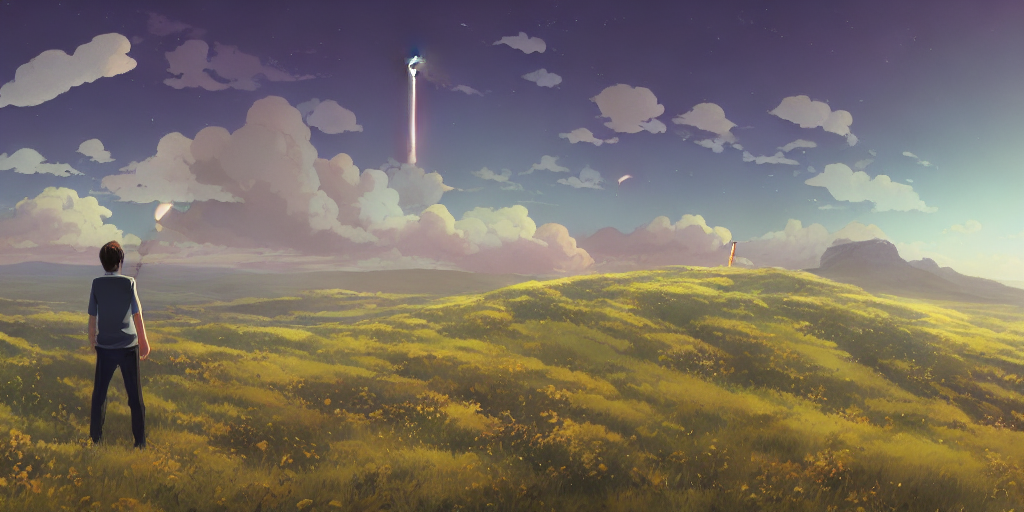

In [9]:
#@title Choose Image
选择图片 = 2 #@param {"type":"integer"}
im = images[选择图片-1]
im

In [11]:
#@title Download File
filename = "niubi.png" #@param {"type":"string"}
im.save(filename)

from google.colab import files
files.download(filename) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>